In [85]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

### Intuition

SVD
- say we want to decompose a square matrix $M$
- we will represent it as $M = U \Sigma V$
    - $U$ is again a rotation matrix
    - $\Sigma$ is a diagonal matrix, scaling each row of $V$
    - $V$ is a rotation matrix, rows of $V$ are (orthonormal) singular vectors
- suppose $M$ is $[n \times d]$ and we only keep the firs $n \leq c$ dimensions, then:
    - $U: [c \times d]$
    - $\Sigma: [d \times d]$
    - $V: [d \times n]$
- if $d = 1$:
    - $U: [c \times 1]$
    - $\Sigma: [1 \times 1]$
    - $V: [1 \times n]$
    
PCA
- sequence of vectors, where each vector is
    - orthogonal to the previous vectors
    - the direction of a line that best fits the data
- the rows of $U$ (from SVD) are equal to these principal vectors

### generate random matrix

In [101]:
n = 4 # number of samples
d = 5 # number of features of each sample
np.random.seed(0)
m = np.random.normal(size=[n, d])
m

array([[1.764, 0.400, 0.979, 2.241, 1.868],
       [-0.977, 0.950, -0.151, -0.103, 0.411],
       [0.144, 1.454, 0.761, 0.122, 0.444],
       [0.334, 1.494, -0.205, 0.313, -0.854]])

### do SVD

In [102]:
U, E, V = np.linalg.svd(m, full_matrices=False)
print(U.shape, E.shape, V.shape)
print(f'{U}\n{E}\n{V}')

(4, 4) (4,) (4, 5)
[[0.967 0.157 -0.001 -0.203]
 [-0.050 -0.446 -0.682 -0.578]
 [0.247 -0.578 -0.262 0.733]
 [0.047 -0.666 0.683 -0.296]]
[3.671 2.277 1.346 0.681]
[[0.492 0.209 0.308 0.604 0.505]
 [0.179 -0.964 -0.036 0.052 0.185]
 [0.635 -0.006 -0.176 0.186 -0.729]
 [0.314 -0.012 0.745 -0.586 -0.056]]


### plot SVD error by the num. of components used

In [103]:
def approximate(m, d):
    U, E, V = np.linalg.svd(m, full_matrices=False)
    m_ = (U[:, :d] @ (E[:d, None]*V[:d]))
    return m_

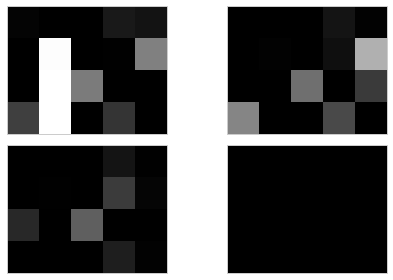

In [104]:
fig, axs = plt.subplots(2, 2, figsize=[7, 4])
axs = axs.flatten()
for i in range(N):
    m_diff = m - approximate(m, i+1)
    axs[i].imshow(m_diff, vmin=0, vmax=1, cmap='gray', label='i')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # axs[i].legend()
plt.tight_layout()
plt.show()

### playground

In [100]:
a = np.zeros([3, 3])
a[0, :] = 1
b = np.zeros([3, 3])
b[:, 0] = 1
np.concatenate([a, b], axis=1)

array([[1.000, 1.000, 1.000, 1.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000]])